# Bar Charts

In [1]:
from altair import *
population = load_dataset('population')

## Single Bar Chart

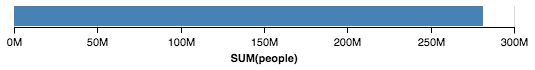

In [2]:
Layer(population, transform=Transform(filter="datum.year==2000")).encode(
    x='sum(people)',
).bar()

## Bar Chart

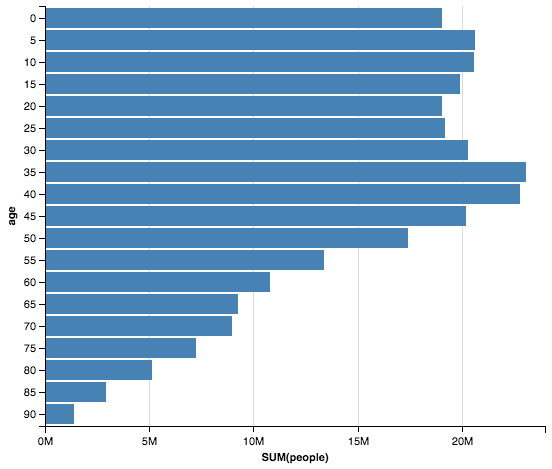

In [3]:
Layer(population, transform=Transform(filter="datum.year==2000")).encode(
    x='sum(people)',
    y='age:O'
).bar()

## Stacked Bar Chart

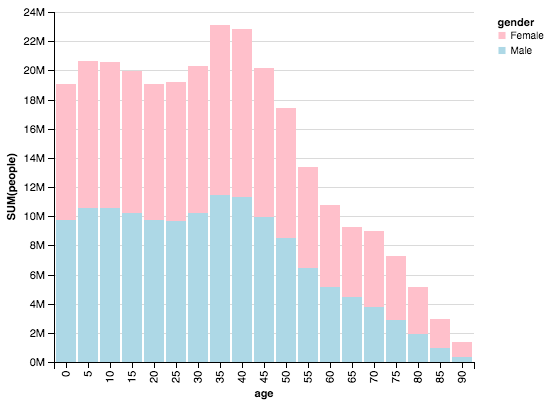

In [4]:
#import numpy as np
#population['gender'] = np.where(population['sex'] == 1, 'Male', 'Female')

transform = Transform(filter='datum.year==2000',
                      calculate=[Formula(field='gender',
                                         expr='datum.sex == 2 ? "Female" : "Male"')])
#transform = Transform(filter='datum.year==2000')

Layer(population, transform=transform).encode(
    x='age:O',
    y='sum(people):Q',
    color=Color('gender:N', scale=Scale(range=["pink", "lightblue"]))
).bar()

## Layered Bar Chart

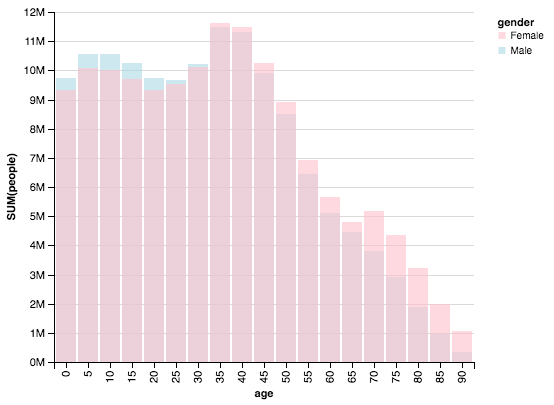

In [5]:
Layer(population, transform=transform).encode(
    x='age:O',
    y='sum(people):Q',
    color=Color('gender:N', scale=Scale(range=["pink", "lightblue"]))
).configure(
    mark=MarkConfig(opacity=0.6, stacked='none')
).bar()

## Normalized Stacked Bar Chart

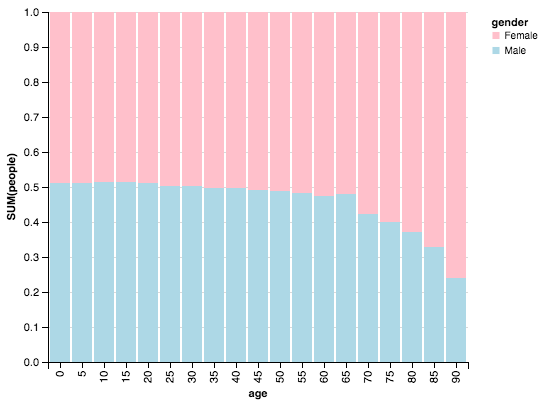

In [6]:
Layer(population, transform=transform).encode(
    x='age:O',
    y='sum(people):Q',
    color=Color('gender:N', scale=Scale(range=["pink", "lightblue"]))
).configure(
    mark=MarkConfig(stacked='normalize')
).bar()

## Grouped Bar Chart

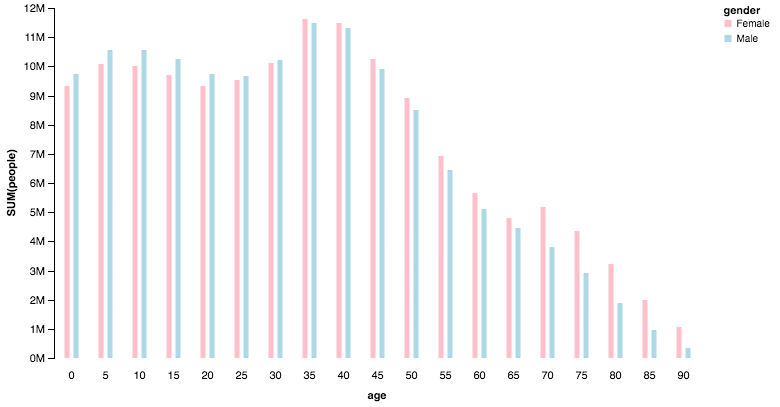

In [7]:
Layer(population, transform=transform).encode(
    X('gender:N', axis=False, scale=Scale(bandSize=6)),
    Y('sum(people):Q', axis=Axis(grid=False)),
    Color('gender:N', scale=Scale(range=["pink", "lightblue"])),
    Column('age:O', axis=Axis(orient='bottom'))
).configure(
    facet=FacetConfig(cell=CellConfig(strokeWidth=0))
).bar()

## Histogram

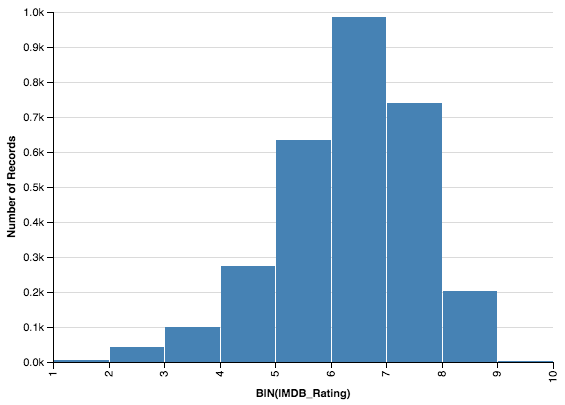

In [8]:
data = load_dataset('movies')
Layer(data).encode(
    x=X('IMDB_Rating', bin=Bin(maxbins=10)),
    y='count(*):Q',
).bar()